# Regresión logística binaria: MLE y SGD

Sea un modelo de regresión logística binaria $p(y\mid\boldsymbol{x}, \boldsymbol{\theta})=\operatorname{Ber}(y\mid\sigma(a))\;$, $y\in\{0,1\}$, con $\;\mu=\sigma(a)\;$ y $\;a=\boldsymbol{w}^t\boldsymbol{x},\;$ en el que asumimos que $\boldsymbol{w}$ absorbe el sesgo $b$. La log-verosimilitud negativa de $\boldsymbol{w}$ respecto a $N$ datos $\mathcal{D}=\{(\boldsymbol{x}_n,y_n)\}\;$ (normalizada por $N$) es:
$$\begin{align*}
\operatorname{NLL}(\boldsymbol{w})%
&=-\frac{1}{N}\log p(\mathcal{D}\mid\boldsymbol{w})\\%
&=-\frac{1}{N}\log \prod_{n=1}^N \operatorname{Ber}(y_n\mid \mu_n)%
&&\text{($\mu_n=\sigma(a_n)$ con logit $a_n=\boldsymbol{w}^t\boldsymbol{x}_n$)}\\%
&=-\frac{1}{N}\sum_{n=1}^N \log(\mu_n^{y_n}\,(1-\mu_n)^{(1-y_n)})\\%
&=-\frac{1}{N}\sum_{n=1}^N y_n\log\mu_n + (1-y_n)\log(1-\mu_n)\\%
&=\frac{1}{N}\sum_{n=1}^N \mathbb{H}(y_n,\mu_n)%
&&\text{($\mathbb{H}$ entropía cruzada)}%
\end{align*}$$

Es fácil comprobar que el gradiente del objetivo es:
$$\mathbf{\nabla}_{\boldsymbol{w}}\operatorname{NLL}(\boldsymbol{w})=\frac{1}{N}\sum_{n=1}^N(\mu_n-y_n)\boldsymbol{x}_n$$

Una manera sencilla de minimizar el objetivo consiste en aplicar descenso por gradiente estocástico con minibatch de talla uno:
$$\boldsymbol{w}_{t+1}=\boldsymbol{w}_t-\eta_t(\mu_n-y_n)\boldsymbol{x}_n$$

**Ejemplo:** datos sintéticos 2d y modelo de sesgo nulo ($b=0$)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

N, n_clusters_per_class, class_sep = 20, 2, 1.0
X, y = make_classification(n_samples=N, n_features=2, n_redundant=0, n_classes=2, 
    n_clusters_per_class=n_clusters_per_class, class_sep=class_sep) #, random_state=1)
print(np.c_[X, y])

[[ 0.86925107  0.37693597  1.        ]
 [ 0.04220172  1.72748908  0.        ]
 [-0.56079628  1.44435377  0.        ]
 [ 0.83291594 -1.08337271  1.        ]
 [-0.28823042 -0.86770275  1.        ]
 [ 1.11989012 -0.9667568   1.        ]
 [-0.59855326 -3.1123428   0.        ]
 [-1.19251477  0.8198785   0.        ]
 [ 1.6163951  -0.84047256  1.        ]
 [-0.56254392 -2.93643157  0.        ]
 [-3.30862013 -0.45598703  0.        ]
 [ 0.97520248  1.79274332  1.        ]
 [-1.05342228 -1.29854726  0.        ]
 [ 1.2594893   1.22534777  1.        ]
 [ 2.13381813  2.09276805  1.        ]
 [-1.18069452 -0.90662464  0.        ]
 [-1.27681506  0.0120526   0.        ]
 [-0.03257701 -1.07814967  1.        ]
 [-1.30762559  0.76097186  0.        ]
 [-1.09933449 -0.84686881  1.        ]]


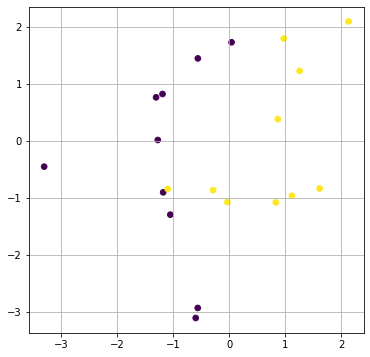

In [2]:
fig, ax = plt.subplots(figsize=(6, 6)); ax.grid(); ax.scatter(*X.T, c=y, s=32)
x_min, x_max = ax.get_xlim(); y_min, y_max = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
XX = np.c_[np.ravel(xx), np.ravel(yy)]

In [3]:
w, eta = np.zeros((N + 1, 2)), 0.3
for n in np.arange(N):
    mun = 1.0 / (1.0 + np.exp(- w[n, :] @ X[n, :]))
    grad = mun - y[n]
    w[n+1, :] = w[n, :] - eta * (mun - y[n]) * X[n, :]
    print(n+1, w[n+1])

1 [0.13038766 0.0565404 ]
2 [ 0.12373113 -0.21593871]
3 [ 0.19200554 -0.39178225]
4 [ 0.2814426  -0.50811292]
5 [ 0.24590249 -0.6151046 ]
6 [ 0.34509538 -0.7007339 ]
7 [0.50276855 0.11913125]
8 [0.63767689 0.02637898]
9 [ 0.7672764  -0.04100853]
10 [0.83863284 0.331466  ]
11 [0.88914538 0.33842753]
12 [0.9436682  0.43865845]
13 [0.9983776  0.50609839]
14 [1.04850489 0.55486686]
15 [1.06920819 0.57517187]
16 [1.12015239 0.6142906 ]
17 [1.19454703 0.61358834]
18 [1.18801578 0.3974338 ]
19 [1.27530743 0.34663448]
20 [0.99664204 0.13196549]


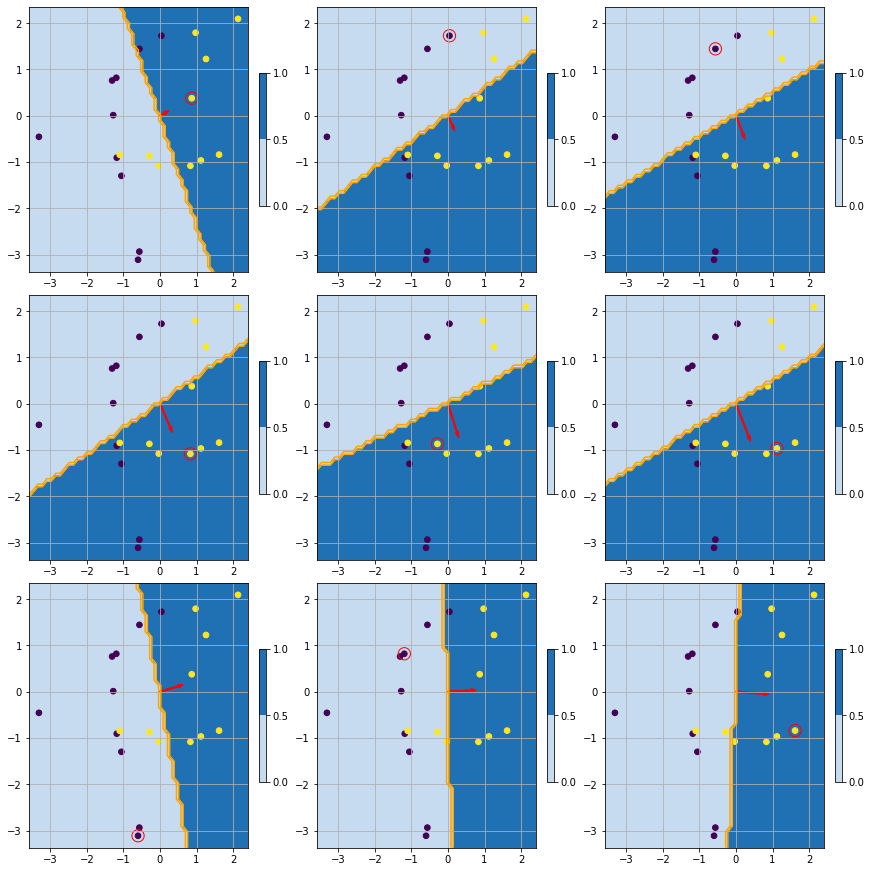

In [4]:
nrows = ncols = int(min(3, np.ceil(np.sqrt(N))));
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12), constrained_layout=True)
for n in np.arange(min(N, nrows * ncols)):
    ax = axes.flat[n]; ax.axis('off'); ax = fig.add_subplot(nrows, ncols, n + 1); ax.grid()
    z = lambda x: w[n + 1, :] @ x
    zz = np.heaviside(np.apply_along_axis(z, 1, XX), 0.0)
    ax.contour(xx, yy, zz.reshape(xx.shape), 1, colors='orange', linestyles='solid')
    cp = ax.contourf(xx, yy, zz.reshape(xx.shape), 1, cmap='Blues')
    plt.colorbar(cp, ax=ax, shrink=0.5)
    ax.arrow(0, 0, w[n+1, 0], w[n+1, 1], width=.03, facecolor='red', edgecolor='red')
    ax.scatter(*X.T, c=y, s=32); ax.scatter(X[n, 0], X[n, 1], facecolors='none', edgecolors='red', s=150)